## Practice activity: Implementing and comparing models

In [2]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

In [52]:
data = {
    'StudyHours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 3, 3, 4, 4, 5, 6, 2, 8, 9, 10, 8],
    'PrevExamScore': [70, 40, 45, 50, 60, 65, 70, 75, 80, 85, 80, 75, 75, 65, 40, 30, 25, 45, 40, 30, 25, 10],
    'Pass': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0]  # 0 = Fail, 1 = Pass
}

df = pd.DataFrame(data)
print(df.head())

   StudyHours  PrevExamScore  Pass
0           1             70     0
1           2             40     0
2           3             45     0
3           4             50     0
4           5             60     0


In [62]:
# Features (X) and Target (y)
X = df[['StudyHours', 'PrevExamScore']]  # Features
y = df['Pass']  # Target variable (0 = Fail, 1 = Pass)

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Testing data: {X_test.shape}, {y_test.shape}")

Training data: (16, 2), (16,)
Testing data: (6, 2), (6,)


In [63]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Train the Logistic Regression model
logreg_model.fit(X_train, y_train)

# Make predictions using the test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")

Logistic Regression Accuracy: 0.8333333333333334


In [65]:
# Initialize the Decision Tree Classifier
tree_model = DecisionTreeClassifier()

# Train the Decision Tree model
tree_model.fit(X_train, y_train)

# Make predictions using the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree}")

Decision Tree Accuracy: 0.5


In [66]:
# Evaluate Logistic Regression
print("Logistic Regression:")
print(f"Accuracy: {accuracy_logreg}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Evaluate Decision Tree
print("Decision Tree:")
print(f"Accuracy: {accuracy_tree}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
print("Classification Report:")
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
Accuracy: 0.8333333333333334
Confusion Matrix:
[[2 1]
 [0 3]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6

Decision Tree:
Accuracy: 0.5
Confusion Matrix:
[[2 1]
 [2 1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.50      0.33      0.40         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6



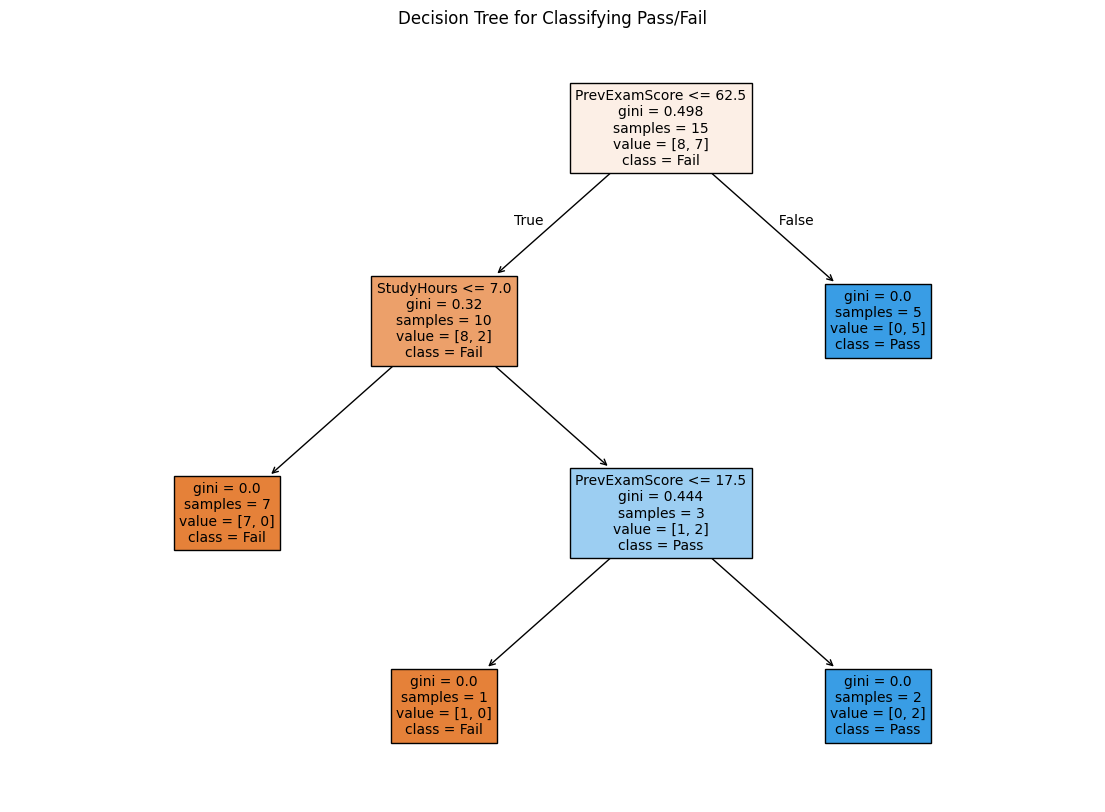

In [51]:
# Visualize the decision tree
plt.figure(figsize=(14,10))
tree.plot_tree(tree_model, feature_names=['StudyHours', 'PrevExamScore'], class_names=['Fail', 'Pass'], filled=True, fontsize=10)
plt.title('Decision Tree for Classifying Pass/Fail')
plt.show()

## Practice activity: Applying transfer learning

In [89]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoded format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Display dataset information
print(f"Training samples: {x_train.shape[0]}, Validation samples: {x_val.shape[0]}, Test samples: {x_test.shape[0]}")

Training samples: 40000, Validation samples: 10000, Test samples: 10000


In [ ]:
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt

# Load the MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Display model architecture
base_model.summary()

# Inspect layers and find the first layer with weights
layer_with_weights = None
for layer in base_model.layers:
    if layer.get_weights():
        layer_with_weights = layer
        break

if layer_with_weights:
    print(f"First layer with weights: {layer_with_weights.name}")
    weights = layer_with_weights.get_weights()[0]
    if weights.ndim == 4:  # Check if weights are compatible for visualization
        plt.imshow(weights[:, :, :, 0], cmap='viridis')
        plt.title(f'Visualizing Features from {layer_with_weights.name}')
        plt.show()
    else:
        print(f"Cannot visualize weights from layer {layer_with_weights.name}: incompatible dimensions.")
else:
    print("No layers with weights found in the model.")

In [77]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# Freeze the base layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)

# Print final validation accuracy
val_accuracy = history.history['val_accuracy'][-1]
print(f"Final Validation Accuracy: {val_accuracy:.2f}")

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 49s 35ms/step - accuracy: 0.2298 - loss: 2.1019 - val_accuracy: 0.3093 - val_loss: 1.9516
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - accuracy: 0.2524 - loss: 2.0404 - val_accuracy: 0.3179 - val_loss: 1.9237
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.2577 - loss: 2.0174 - val_accuracy: 0.3281 - val_loss: 1.9026
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - accuracy: 0.2614 - loss: 2.0046 - val_accuracy: 0.3173 - val_loss: 1.8903
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.2689 - loss: 1.9938 - val_accuracy: 0.3260 - val_loss: 1.8851
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.2672 - loss: 1.9901 - val_accuracy: 0.3278 - val_loss: 1.8779
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.2727 - loss: 1.9842 - val_accuracy: 0.3270 - val_loss: 1.8724
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.2732 -

In [71]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Analyze feature maps from an intermediate layer
from tensorflow.keras.models import Model
intermediate_layer_model = Model(inputs=model.input, outputs=base_model.get_layer('block_1_expand_relu').output)
intermediate_output = intermediate_layer_model.predict(x_test[:5])

# Display feature map dimensions
print(f"Feature maps for the first test sample have shape: {intermediate_output[0].shape}")

313/313 - 7s - 21ms/step - accuracy: 0.3306 - loss: 1.8566
Test Accuracy: 0.33
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Feature maps for the first test sample have shape: (16, 16, 96)


In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

# Define a baseline model
baseline_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile and train the baseline model
baseline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
baseline_history = baseline_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)

# Evaluate the baseline model
baseline_loss, baseline_accuracy = baseline_model.evaluate(x_test, y_test, verbose=2)
print(f"Baseline Model Test Accuracy: {baseline_accuracy:.2f}")

# Summarize comparison
print(f"Transfer Learning Test Accuracy: {test_accuracy:.2f}")
print(f"Baseline Model Test Accuracy: {baseline_accuracy:.2f}")

C:\Users\Shahram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - accuracy: 0.4604 - loss: 1.5005 - val_accuracy: 0.5443 - val_loss: 1.2805
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.5706 - loss: 1.2175 - val_accuracy: 0.5792 - val_loss: 1.2066
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.6122 - loss: 1.1061 - val_accuracy: 0.6134 - val_loss: 1.1130
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.6423 - loss: 1.0182 - val_accuracy: 0.6008 - val_loss: 1.1337
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 0.6686 - loss: 0.9466 - val_accuracy: 0.6256 - val_loss: 1.0750
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.6927 - loss: 0.8805 - val_accuracy: 0.6151 - val_loss: 1.1177
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.7091 - loss: 0.8274 - val_accuracy: 0.6207 - val_loss: 1.1053
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.7301 -

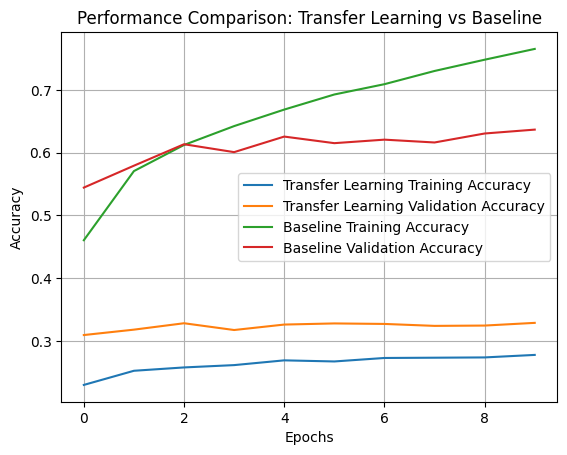

In [123]:
# Compare training and validation accuracy
plt.plot(history.history['accuracy'], label='Transfer Learning Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Transfer Learning Validation Accuracy')
plt.plot(baseline_history.history['accuracy'], label='Baseline Training Accuracy')
plt.plot(baseline_history.history['val_accuracy'], label='Baseline Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Performance Comparison: Transfer Learning vs Baseline')
plt.grid(True)  # Add grid for clarity
plt.show()

## Implementing ensemble methods

In [282]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_wine as data_loader

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

X, Y = data_loader(return_X_y=True)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

(x_train - x_train.min(axis=0))/(x_train.max(axis=0) - x_train.min(axis=0))
(x_test - x_test.min(axis=0))/(x_train.max(axis=0) - x_train.min(axis=0))


array([[0.24210526, 0.00395257, 0.        , 0.        , 0.10869565,
        0.21724138, 0.00588235, 0.20754717, 0.        , 0.06693307,
        0.3902439 , 0.17948718, 0.19252188],
       [0.36052632, 0.48418972, 0.7704918 , 0.47340426, 0.10869565,
        0.04482759, 0.03235294, 0.43396226, 0.17350158, 0.8971029 ,
        0.12195122, 0.15384615, 0.32378679],
       [0.27894737, 0.16007905, 0.50819672, 0.52659574, 0.07608696,
        0.29310345, 0.40294118, 0.28301887, 0.33438486, 0.16583417,
        0.38211382, 0.82051282, 0.31344471],
       [0.22105263, 0.44466403, 0.69672131, 0.39361702, 0.10869565,
        0.51724138, 0.71764706, 0.52830189, 0.75394322, 0.1018981 ,
        0.69105691, 0.54945055, 0.10182975],
       [0.72105263, 0.13241107, 0.91803279, 0.31382979, 0.32608696,
        0.67241379, 0.99411765, 0.28301887, 0.45425868, 0.74125874,
        0.53658537, 0.54578755, 1.11535402],
       [0.43684211, 0.19367589, 1.13934426, 0.79255319, 0.41304348,
        0.29310345, 0.21470

In [288]:
# Display dataset information
print(f"Training samples: {x_train.shape[0]}, Test samples: {x_test.shape[0]}")

rfc_model = RandomForestClassifier(n_estimators=10)
rfc_model.fit(x_train, y_train)
print(f"RFC accuracy: {accuracy_score(rfc_model.predict(x_test), y_test)}")


gbm_model = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1)
gbm_model.fit(x_train, y_train)
print(f"GBM accuracy: {accuracy_score(gbm_model.predict(x_test), y_test)}")

tree_model = DecisionTreeClassifier(max_depth=20,splitter='best',)
svc_model = SVC(probability=True)
reg_model = LogisticRegression()

stack_model = StackingClassifier(estimators=[("tree_model",tree_model), ("svc_model",svc_model)], final_estimator=reg_model)
stack_model.fit(x_train, y_train)
print(f"GBM accuracy: {accuracy_score(stack_model.predict(x_test), y_test)}")


Training samples: 142, Test samples: 36
RFC accuracy: 0.9722222222222222
GBM accuracy: 0.9166666666666666
GBM accuracy: 0.9444444444444444


## Walkthrough: Developing generative models

In [1]:
from datasets import load_dataset
dataset = load_dataset("Abirate/english_quotes")
words = " ".join(dataset['train']['quote'])
# words = list(dataset['train']['quote'])

C:\Users\monno\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# words = [str(q.replace('“','').replace('”','').replace('.','')) for q in words]
words = words.replace('“','').replace('”','')

In [3]:
words

'Be yourself; everyone else is already taken. I\'m selfish, impatient and a little insecure. I make mistakes, I am out of control and at times hard to handle. But if you can\'t handle me at my worst, then you sure as hell don\'t deserve me at my best. Two things are infinite: the universe and human stupidity; and I\'m not sure about the universe. So many books, so little time. A room without books is like a body without a soul. Be who you are and say what you feel, because those who mind don\'t matter, and those who matter don\'t mind. You\'ve gotta dance like there\'s nobody watching,Love like you\'ll never be hurt,Sing like there\'s nobody listening,And live like it\'s heaven on earth. You know you\'re in love when you can\'t fall asleep because reality is finally better than your dreams. You only live once, but if you do it right, once is enough. Be the change that you wish to see in the world. In three words I can sum up everything I\'ve learned about life: it goes on. If you want 

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts([words])
sequences = tokenizer.texts_to_sequences([words])
max_len = max([len(x) for x in sequences])
padded_seq = pad_sequences(sequences, maxlen=max_len, padding='pre')

In [5]:
print(max_len)
print(sequences)
padded_seq.shape

78057
[[12, 116, 244, 169, 8, 397, 723, 97, 1820, 2366, 4, 5, 134, 1821, 6, 72, 440, 6, 83, 69, 7, 596, 4, 44, 246, 268, 3, 1822, 18, 20, 2, 139, 1822, 29, 44, 26, 597, 79, 2, 314, 31, 320, 47, 598, 29, 44, 26, 151, 195, 65, 14, 724, 1, 293, 4, 187, 1232, 4, 97, 13, 314, 67, 1, 293, 43, 166, 112, 43, 134, 64, 5, 506, 106, 112, 8, 38, 5, 382, 106, 5, 167, 12, 33, 2, 14, 4, 94, 23, 2, 130, 56, 101, 33, 159, 47, 186, 4, 101, 33, 186, 47, 159, 315, 1823, 535, 38, 214, 453, 810, 25, 38, 247, 42, 12, 262, 667, 38, 214, 453, 811, 4, 80, 38, 58, 625, 41, 303, 2, 50, 95, 11, 25, 27, 2, 139, 223, 626, 56, 294, 8, 472, 160, 55, 15, 252, 2, 57, 80, 184, 18, 20, 2, 30, 10, 109, 184, 8, 161, 12, 1, 156, 9, 2, 383, 3, 81, 11, 1, 61, 11, 384, 140, 6, 24, 2367, 59, 145, 193, 563, 67, 39, 10, 441, 41, 20, 2, 54, 3, 50, 23, 5, 812, 38, 207, 5, 76, 163, 44, 60, 28, 1233, 49, 3452, 13, 49, 2368, 188, 337, 11, 564, 7, 1824, 6, 138, 13, 3453, 337, 428, 1824, 6, 138, 13, 3454, 966, 1824, 51, 12, 26, 215, 20, 

(1, 78057)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.utils import to_categorical

gan_model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=max_len-1),
    LSTM(150),
    Dense(len(tokenizer.word_index)+1, activation='softmax')
])

gan_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
X, y = padded_seq[:, :-1], padded_seq[:, -1]
y = to_categorical(y, num_classes=len(tokenizer.word_index)+1)

C:\Users\monno\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [7]:
gan_model.fit(X, y, epochs=2)

Epoch 1/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 310s 310s/step - accuracy: 0.0000e+00 - loss: 8.9350
Epoch 2/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 311s 311s/step - accuracy: 1.0000 - loss: 8.9253


In [376]:
gan_model.save(filepath="gan.keras")

In [11]:
def generate_text(seed_text, next_words, max_seq_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen = max_len-1, padding='pre')
        predicted = gan_model.predict(token_list, verbose=0).argmax(axis=-1)
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                seed_text += " " + word
                break
    return seed_text

In [14]:
respon = generate_text("if you are trying to", 10, max_len)
print(respon)

if you are trying to loud loud loud sleepy sleepy sky loud rights1 loud loud


In [13]:
gan_model.save("gan2epoch.keras")